In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from torch import nn

In [3]:
torch.__version__

'2.5.1'

In [7]:
torch.mps.is_available()

True

# Creating data using Linear Regression

#### Linear Regression equation: Y = a + bx

In [8]:
#creating known parameters
weight = 0.7 #b
bias = 0.3 #a

In [9]:
#Creating data
start = 0
end = 1

step = 0.02
X = torch.arange(start, end, step)

In [12]:
X, X.size()

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 torch.Size([50]))

In [13]:
X = X.unsqueeze(dim = 1)

In [15]:
X.size()

torch.Size([50, 1])

In [17]:
Y = bias + weight * X

In [18]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [19]:
Y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [21]:
len(X), len(Y)

(50, 50)

In [26]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test , y_test = X[train_split: ], Y[train_split:]

In [27]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [33]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c = 'b', s=4, label = "training data")
    plt.scatter(test_data, test_labels, c = 'g', s=4, label = "test data")

    if (predictions is not None):
        plt.scatter(test_data, predictions, c = "r", s = 4, label = "predictions")
    plt.legend(prop = {"size":14})

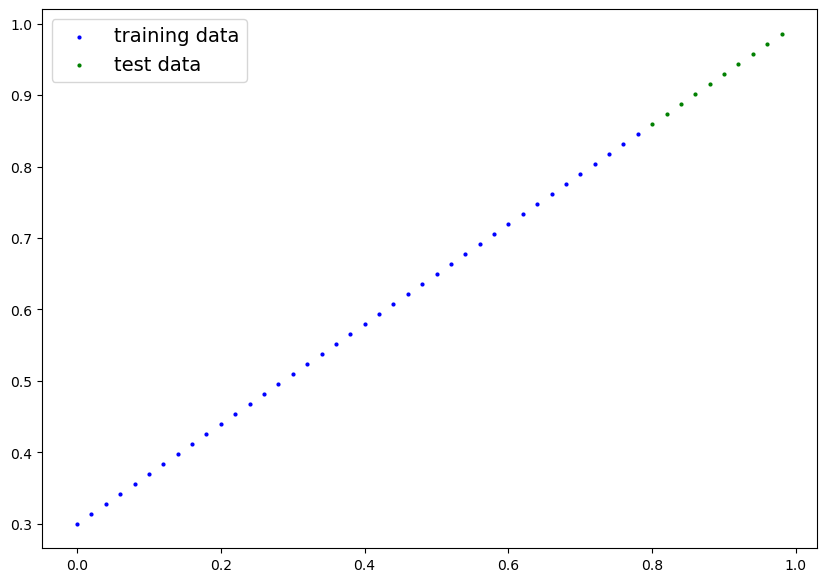

In [34]:
plot_predictions()

### Creating linear regression model, using PyTorch

In [46]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) #helps with gradientdescent and back propagation
        self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    #forward method to define computation in the model
    def forward(self, x: torch.Tensor)-> torch.Tensor: #forward function needed bt nn.Module method, it defines the calculation (formula)
        return self.weights * x + self.bias#regression formula


### PyTorch module	What does it do?

* torch.nn	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
* torch.nn.Parameter	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".
* torch.nn.Module	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.
* torch.optim	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).
* def forward()	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).
If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from torch.nn,

* nn.Module contains the larger building blocks (layers)
* nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

In [47]:
#using random seed for random values
torch.manual_seed(42)
model_0 = LinearRegressionModel() #instance of model

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [48]:
model_0.state_dict() #lists named params

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### prediction using `torch.inference_mode()`

In [54]:
with torch.inference_mode(): #if you see `torch.no_grad` used anywhere, please use inference_mode
    y_preds = model_0(X_test)

In [55]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [56]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

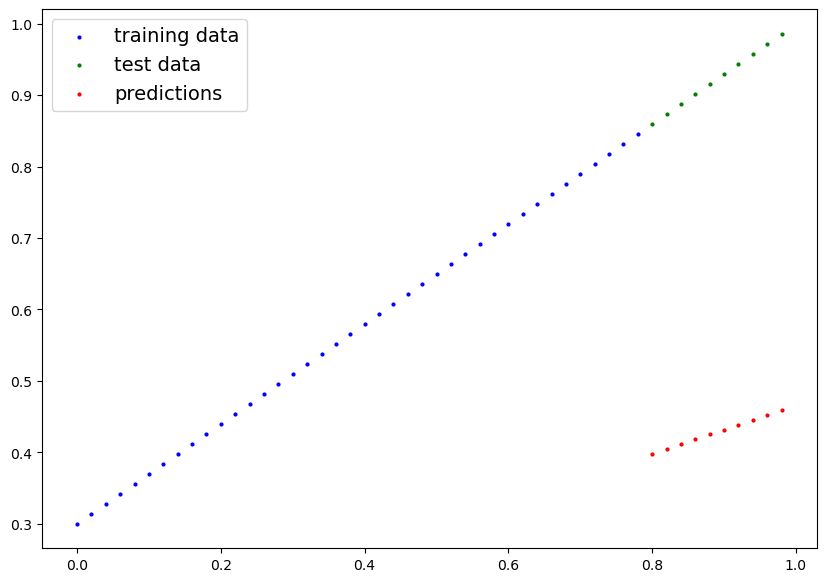

In [57]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (I also refer to parameters as patterns), the weights and bias values we set randomly using nn.Parameter() and torch.randn() to be something that better represents the data.

We could hard code this (since we know the default values weight=0.7 and bias=0.3) but where's the fun in that?

Much of the time you won't know what the ideal parameters are for a model.

Instead, it's much more fun to write code to see if the model can try and figure them out itself.

Creating a loss function and optimizer in PyTorch
For our model to update its parameters on its own, we'll need to add a few more things to our recipe.

And that's a loss function as well as an optimizer.

In [61]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable),
                                     # lower=less (might take a long time))

### Creating the training loop

In [69]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 10 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 20 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 30 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 40 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 50 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 60 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 70 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 80 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 
Epoch: 90 | MAE Train Loss: 0.00893248151987791 | MAE Test Loss: 0.005023092031478882 


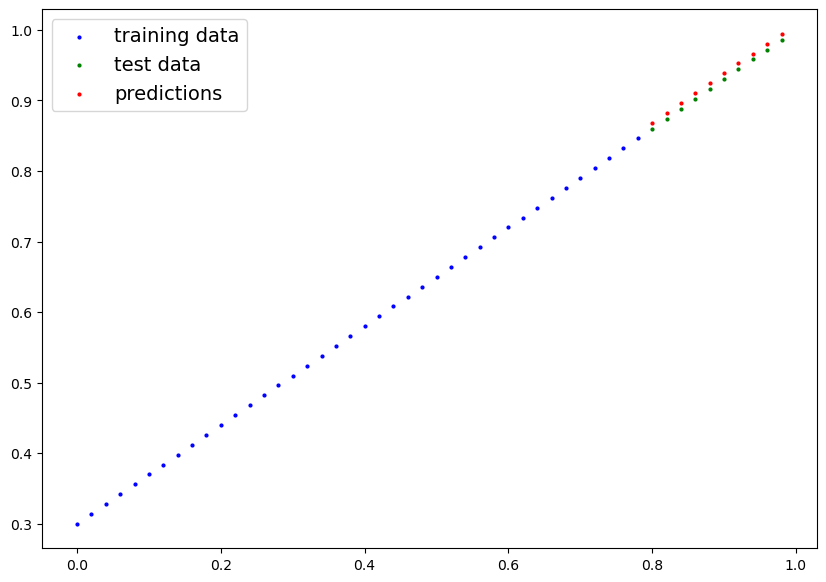

In [70]:
plot_predictions(X_train, y_train, X_test, y_test, test_pred)

In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### PyTorch Save and Load

* `torch.save`	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
* `torch.load`	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
* `torch.nn.Module.load_state_dict`	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [72]:
from pathlib import Path

In [73]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)
MODEL_NAME = "Linear_Regression_Model.pth" #PyTorch objects have usually .pt or .pth extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/Linear_Regression_Model.pth')

In [80]:
print("Model saved to", MODEL_SAVE_PATH)
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Model saved to models/Linear_Regression_Model.pth


#### Loading a new model with state_dict of trained model

In [81]:
new_model = LinearRegressionModel()

In [82]:
new_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

/var/folders/vf/64r8j3px5m7_0cwl_br4gt2c0000gn/T/ipykernel_48529/125751781.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load(MODEL_SAV

<All keys matched successfully>

In [83]:
new_model.eval()

LinearRegressionModel()

In [85]:
with torch.inference_mode():
    loaded_model_predictions = new_model(X_test)
loaded_model_predictions

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [86]:
test_pred == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [88]:
device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps
